##  ‧₊˚🎄✩ ₊˚🦌⊹♡ Advent of Code 2024 ‧₊˚🎄✩ ₊˚🦌⊹♡

The resolutions for the new year are to have a good trade off between shortness, readability and performance

In [1]:
import heapq
import operator
import itertools
import functools
import statistics
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

----------

### Day 1: Historian Hysteria 🎄

Easy start. Using `pandas` makes the import a bit cleaner to me in this first game.

In [10]:
df = pd.read_csv('data/day1.txt', sep='   ', header=None, engine='python')

delta = np.abs(np.sort(df[0]) - np.sort(df[1])).sum()
counter = collections.Counter(df[1])
delta_diff = sum(i * counter[i] for i in df[0])

print(f"Answer 1: {delta}")
print(f"Answer 2: {delta_diff}")

Answer 1: 2375403
Answer 2: 23082277


-----------

### Day 2: Red-Nosed Reports 🦌🔴

Less clean than the solution proposed for instance by Peter Norvig but more efficient. Also, in `is_safe_repair`, Peter tries all the combinations while just the first one is enough because the texts says it is feasible if we can repair ONE infeasibility. But it's okay, Google is Google and capitalism is 💩.

In [17]:
with open ('data/day2.txt') as f:
    rows = [list(map(int, line.split(' '))) for line in f]

def inrange(delta):
    return 1 <= abs(delta) <= 3

def is_safe(row):
    rowthread = int(row[0] > row[-1])
    return all(int(i > j) == rowthread and inrange(i - j) for i, j in zip(row, row[1:]))

def is_safe_repair(row):
    rowthread = int(row[0] > row[-1])
    idx = next(idx for idx, (i, j) in enumerate(zip(row, row[1:])) if int(i > j) != rowthread or not inrange(i - j))
    return is_safe(row[:idx] + row[idx + 1:]) or is_safe(row[:idx + 1] + row[idx + 2:])

safe_count = sum(1 for row in rows if is_safe(row))
safe_repair = sum(1 for row in rows if is_safe(row) or is_safe_repair(row))

print("Answer 1: ", safe_count)
print("Answer 2: ", safe_repair)

Answer 1:  356
Answer 2:  413


-------

### Day 3: Mull It Over 📖

The book in the title is because we are doing string manipulation, the most horrible of all tasks. Together with carbon for bad kids ⛽️ because I don't want to lose time on this. The `import re` is here because I hope I don't need regex anymore.

Curious that `mul` is also a function in the `operator` module, so we can use `eval('operator.' + mulstr)` after importing `operator` to evaluate a multiplication ⚡️.

I'm definetly not an expert, but it seems regex multiline is not working, that's why `text.replace('\n', '')`. I like the 💄 emoji.

Please note this solution is not working in case of a deactivation `don't()` at the end not followed by any `do()`, but I verified this was not the case in the dataset and, again, I hate losing time on strings manipulation.

In [4]:
import re

with open ('data/day3.txt') as f:
    text = f.read()

def compile(mulstr):
    return eval('operator.' + mulstr)

total = sum(compile(i) for i in re.findall(r'mul\(\d+,\d+\)', text))
active_text = re.sub(r"don't\(\).*?(do\(\)|$)", "💄", text.replace('\n', ''))
active_total = sum(compile(i) for i in re.findall(r'mul\(\d+,\d+\)', active_text))

print("Answer 1: ", total)
print("Answer 2: ", active_total)

Answer 1:  184576302
Answer 2:  118173507


--------------

### Day 4: Ceres Search 🍺

As italian, the Ceres to me is a beer 🍺. And the input is a beautiful 140 x 140 matrix, and to me this means `numpy`.
Curious that I wrote the first function `get_xmas_in_line` to detect horizontal written XMAS and I realized, first, that it was possible to use it for vertically written XMAS by simply transposing the matrix, then, that it was possible to use it for diagonal XMAS as well 🤯 by rolling separately each column. However, it was getting too complicated and I opted for a simple nested for loop 🫏.

Like `a` becomes `b` by rolling column 0 by 0, column 1 by -1, column 2 by -2 and column 3 by -3.
```
a = [[X # # #]
     [# M # #]
     [# # A #]
     [# # # S]]
b = [[X M A S]
     [# # # #]
     [# # # #]
     [# # # #]]
```

Second part on X-MAS reminds me a porn (that's why `get_xmas_diagonal_porn`function).

Horrible idea using `numpy`, I give myself a 5 this time. Julia functions vectorization is way cleaner by the way.

In [66]:
with open ('data/day4.txt') as f:
    data = np.array([list(line.replace('\n', '')) for line in f])

def get_xmas_in_line(matrix, rolling):
    xmas, samx = np.array(['X', 'M', 'A', 'S']), np.array(['S', 'A', 'M', 'X'])
    rolled_matrix = np.roll(matrix, rolling, axis=1)
    rolled_matrix[:, :rolling] = "N"
    return int(np.all( rolled_matrix.reshape((-1, 4)) == xmas, axis=1).astype(int).sum()) + \
           int(np.all( rolled_matrix.reshape((-1, 4)) == samx, axis=1).astype(int).sum())

def get_numeric_matrix(matrix):
    num = np.zeros(matrix.shape)
    for letter, number in zip(('X', 'M', 'A', 'S'), range(1, 5)):
        num[matrix == letter] = number
    return num

def get_xmas_diagonal(matrix):
    xmas, samx = np.array([1,2,3,4]), np.array([4,3,2,1])
    return sum(
        sum([
            int(np.array_equal((matrix[i:i+4, j:j+4] * np.eye(4,4)).sum(axis=0), xmas)),
            int(np.array_equal((matrix[i:i+4, j:j+4] * np.eye(4,4)).sum(axis=0), samx)),
            int(np.array_equal((matrix[i:i+4, j:j+4] * np.flip(np.eye(4,4), axis=1)).sum(axis=0), xmas)),
            int(np.array_equal((matrix[i:i+4, j:j+4] * np.flip(np.eye(4,4), axis=1)).sum(axis=0), samx))
        ])
        for i in range(matrix.shape[0] - 3) for j in range(matrix.shape[1] - 3)
    )

def get_xmas_diagonal_porn(matrix):
    xeye = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
    return sum(
        sum([
            int(np.array_equal( matrix[i:i+3, j:j+3] * xeye, np.array([[2, 0, 2],[0, 3, 0],[4, 0, 4]]))),
            int(np.array_equal( matrix[i:i+3, j:j+3] * xeye, np.array([[4, 0, 4],[0, 3, 0],[2, 0, 2]]))),
            int(np.array_equal( matrix[i:i+3, j:j+3]* xeye, np.array([[4, 0, 2],[0, 3, 0],[4, 0, 2]]))),
            int(np.array_equal( matrix[i:i+3, j:j+3]* xeye, np.array([[2, 0, 4],[0, 3, 0],[2, 0, 4]]))),
        ])
        for i in range(matrix.shape[0] - 2) for j in range(matrix.shape[1] - 2)
    )

h = sum(get_xmas_in_line(data, rolling=i) for i in range(4))
v = sum(get_xmas_in_line(data.T, rolling=i) for i in range(4))
d = get_xmas_diagonal(get_numeric_matrix(data))
xd = get_xmas_diagonal_porn(get_numeric_matrix(data))
print("Answer 1: ", h + v + d)
print("Answer 2: ", xd)

Answer 1:  2358
Answer 2:  1737


------------

### Day 5: Print Queue 🦚

Tail, queue, that's why the peacock. Somebody says this is ADHD. To me it's fantasy. I hate these stupid sequences that respect rules 👮🏾 slaves of the state.

I was sure Python offered the possibility to sort by a comparison function but it was not. This is a shame. Another +1 to Julia. In general this was a pretty boring one. No reason to comment the procedure. Of course, the most efficient way to repair the sequences was to use a tree, but given the size of sequences this complication is not justified. As always happens, the state does not invest much in reintegrating who doesn't respect rules 🚔🚓.

In [87]:
rules = collections.defaultdict(set)
data = []

with open ('data/day5.txt') as f:
    reading_data = False
    for line in f:
        if line == '\n':
            reading_data = True
            continue
        if not reading_data:
            rule = line.split('|')
            rules[int(rule[0])].add(int(rule[1]))
        else:
            data.append(list(map(int, line.split(','))))

def respect_rules(seq, rules):
    return all(len(rules[i] & set(seq[:pos])) == 0 for pos, i in enumerate(seq))

def get_middle(seq):
    return seq[len(seq) // 2]

def fix_sequence(seq, rules):
    return sorted(seq, key=functools.cmp_to_key(lambda i, j: -1 if j in rules[i] else 1))

respect_rules_count = sum(get_middle(i) for i in data if respect_rules(i, rules))
do_not_respect_rules_count = sum(get_middle(fix_sequence(i, rules)) for i in data if not respect_rules(i, rules))

print(f"Answer 1: {respect_rules_count}")
print(f"Answer 2: {do_not_respect_rules_count}")

Answer 1: 5275
Answer 2: 6191


-------

### Day 6: Guard Gallivant 💂🏻💂🏻💂🏾‍♀️

When I started reading the problem I hoped for a few seconds in a request to write a shortest path finding algorithm 🤩(but it was not). Let's call directions `up = 0`, `right = 1`, `down = 2`, `left = 3`. While the `turn` function seems a piece of art, the rest is a bit verbose, but it's okay. The fact of having to deal with directions make it verbose. I'm curious if there's a way to automatically manage directions (maybe simply rotating the matrix of space) 🤔. There is a possibility I'll come back to rewrite this.

For the second part 🎬2️⃣, my first intuition was that we need to look at already encountered obstacles, and find 3 of them that together with the new one would form a parallelepiped ▱. Also, we are lucky, because they always need to be in order in the sequence of already found obstacles (this reduces a lot the probabilities 🏎️). But then SBAM 💥, looking at option five presented in the example I realised we can have a loop even without a parallelepiped. In this case a classic brute force should work (around `10`s running time).

In the case of the brute force, the loop is detected when the guard pass a second time on a position with also the same direction 🧞‍♂️.

Together with the brute force, I also tried to place an obstacle in every position visited at the first round, classifying it as a loop if the guard was redirected into an already visited obstacle with the same direction. This approach although was detecting some non-existent loops. Curious. I still have to figure out why 🐨.

In [84]:
with open ('data/day6.txt') as f:
    m = np.array([list(line.replace('\n', '')) for line in f])
    m = np.where(m == '.', 0, np.where(m == '#', 1, -1)).astype(np.int32)

def turn(direction):
    return (direction + 1) % 4

def guard_pos(m):
    return tuple(map(int, map(operator.itemgetter(0), np.where(m == -1))))

def in_grid(pos, grid):
    return 0 <= pos[0] < grid.shape[0] and 0 <= pos[1] < grid.shape[1]

def get_visited_pos(orig, dest):
    return tuple((orig[0], i) for i in range(orig[1], dest[1], 1 if dest[1] > orig[1] else -1)) if orig[0] == dest[0] \
        else tuple((i, orig[1]) for i in range(orig[0], dest[0], 1 if dest[0] > orig[0] else -1))

def next_obstacle(pos, direction, m):
    if direction == 0: return next(((i, pos[1]) for i in range(pos[0], -1, -1) if m[i, pos[1]] == 1), (-1, pos[1]))
    elif direction == 1: return next(((pos[0], i) for i in range(pos[1], m.shape[1]) if m[pos[0], i] == 1), (pos[0], m.shape[1]))
    elif direction == 2: return next(((i, pos[1]) for i in range(pos[0], m.shape[0]) if m[i, pos[1]] == 1), (m.shape[0], pos[1]))
    elif direction == 3: return next(((pos[0], i) for i in range(pos[1], -1, -1) if m[pos[0], i] == 1), (pos[0], -1))

def simulate_loop(obs_pos, m):
    m[obs_pos] = 1
    _, loop = get_path(m)
    m[obs_pos] = 0
    return loop

def get_path(m):
    direction, visited, visited_with_direction = 0, set(), set()
    cpos = guard_pos(m)
    while True:
        obs = next_obstacle(cpos, direction, m)
        newly_visited = get_visited_pos(cpos, obs)
        newly_visited_with_direction = set([(i, j, direction) for i, j in newly_visited])
        visited.update(newly_visited)
        # loop when passing on same position with same direction two times
        if len(newly_visited_with_direction & visited_with_direction) > 0:
            return visited, True
        visited_with_direction.update(newly_visited_with_direction)
        # guard exits
        if not in_grid(obs, m):
            break
        direction = turn(direction)
        cpos = newly_visited[-1]
    return visited, False

visited, _ = get_path(m)
loop_options = sum(simulate_loop(pos, m) for pos in visited - {guard_pos(m)})

print(f"Answer 1: {len(visited)}")
print(f"Answer 2: {loop_options}")

Answer 1: 5453
Answer 2: 2188


-------------

### Day 7: Bridge Repair 🌉

The italian's bridge, as the idiot Salvini says. Period 🗿. We would be nothing without the glorious module: `functools` 🔱.

In [73]:
with open ('data/day7.txt') as f:
    ops = [ (int(line.split(':')[0]), tuple(map(int, line.replace('\n', '').split(': ')[1].split(' ')))) for line in f]

def join_operator(a, b):
    return int(str(a) + str(b))

def calibration(result, seq, operators):
    if any( functools.reduce(lambda r, i: i[0](r, i[1]), zip(op, seq[1:]), seq[0]) == result
        for op in itertools.product(operators, repeat=len(seq) - 1)):
        return result
    return 0

calibration_result_1 = sum(calibration(res, seq, operators=(operator.add, operator.mul)) for res, seq in ops)
calibration_result_2 = sum(calibration(res, seq, operators=(operator.add, operator.mul, join_operator)) for res, seq in ops)

print(f"Answer 1: {calibration_result_1}")
print(f"Answer 2: {calibration_result_2}")

Answer 1: 6392012777720
Answer 2: 61561126043536


--------------

### Day 8: Resonant Collinearity 📡

Geometry first kids 📐. You don't know how to compute the points in which a circle intersects a line? Go study it, God Damn! 🤬
[Here](https://github.com/mattianeroni/space-exploration/blob/main/src/main/java/sx/pathsmoother/GeometricSmoother.java) is how in Java. Directly from my repo on space exploration made for autonomous driving drones ✈️. Alternatively you can use `scikit-spatial`. But wait. Why we need to compute where a circle intersect a line Professor 🧑🏽‍🏫? Because antinodes are on the line formed by two antennas at a distance which is twice the one between antennas (i.e., a circe ⭕️centered in one of the antennas with a radius twice the distance between antennas), easy right 🍼?

But isn't there a simpler solution? ❔Of course, we are not a shitty company where everything is overcomplicated. That's it, `numpy` and manhattan distance (`numpy` just because `+` and `-` are already implemented and much prettier 😻than a function `sum` 🤢).

The `range(world.shape[0])` is not a chirurgical solution, but it was sugar compared to a `while inside()` loop .

In [207]:
world = pd.read_csv('data/day8.txt', delimiter='', engine='python', header=None).to_numpy()[:, 1:-1]
freq_to_site = {i : np.where(world == i) for i in set(np.unique(world)) - {'.'}}

def inside(pos, world):
    return 0 <= pos[0] < world.shape[0] and 0 <= pos[1] < world.shape[1]

def totuple(pos):
    return tuple(pos.tolist())

def get_antinodes(antenna_a, antenna_b):
    dist = antenna_b - antenna_a
    return totuple(antenna_b + dist), totuple(antenna_a - dist)

def get_antinodes_with_harmonics(antenna_a, antenna_b, world):
    dist = antenna_b - antenna_a
    return [totuple(antenna_b + dist * i) for i in range(world.shape[0])] + [totuple(antenna_a - dist * i) for i in range(world.shape[0])]

antinodes = set(antinode
    for x, y in freq_to_site.values()
    for a, b in itertools.combinations(zip(x, y), 2)
    for antinode in get_antinodes(np.asarray(a), np.asarray(b)) if inside(antinode, world)
)

antinodes_with_harmonics = set(antinode
    for name, (x, y) in freq_to_site.items()
    for a, b in itertools.combinations(zip(x, y), 2)
    for antinode in get_antinodes_with_harmonics(np.asarray(a), np.asarray(b), world) if inside(antinode, world)
)

print(f"Answer 1: {len(antinodes)}")
print(f"Answer 2: {len(antinodes_with_harmonics)}")

Answer 1: 240
Answer 2: 955


--------

### Day 9: Disk Fragmenter 💾

What is human memory in Gb? 🧠 For sure if I read it, I forget it after 2 seconds.

In part 1 1️⃣, it wasn't clear if we had to treat single digits or numbers, and all the examples provided arrive until 9 leaving unclear what to do with numbers of `> 2` digits. Am I the only one who had this doubt 🧐? Hope Santa is not one of those leaders not able to explain tasks, this would break my heart 💔.

For the first part, I simply worked with a list of numbers moving from left to right ➡️with spaces and right to left ⬅️with numbers and switching every pair `(space, number)` until the two iterations did not match in the middle.

For second part 🎬, I think we found a very efficient solution by reading the disk as a list-of-lists (i.e., files and spaces). Then, per each file from right to left, we find a space at its left. If the space 🪐 does not exist we pass to the next file.

I have to say this has been the trickiest exercise until now 💦.


In [91]:
with open ('data/day9.txt') as f:
    disk = f.read()

def left_shift(disk):
    i = next(idx for idx, s in enumerate(disk) if s == '.')
    j = len(disk) - 1 - next(idx for idx, s in enumerate(reversed(disk)) if s != '.')
    while i < j:
        disk[i], disk[j] = disk[j], '.'
        i += next(idx for idx, s in enumerate(disk[i:]) if s == '.')
        j -= next(idx for idx, s in enumerate(reversed(disk[:j+1])) if s != '.')
    return disk

def left_shift_files(disk):
    file_idx = len(disk) - 1
    while file_idx > 0:
        file_idx -= next(idx for idx, s in enumerate(reversed(disk[:file_idx+1])) if s[0] != '.')
        space_idx = next((idx for idx, i in enumerate(disk[:file_idx]) if i[0] == '.' and len(i) >= len(disk[file_idx])), None)
        if space_idx is None:
            file_idx -= 1
            continue
        file, space = disk[file_idx], disk[space_idx]
        disk[file_idx] = ['.'] * len(file)
        if len(file) == len(space):
            disk.pop(space_idx)
        else:
            disk[space_idx] = ['.'] * (len(space) - len(file))
        disk.insert(space_idx, file)
    return disk

packed_disk = list(itertools.chain.from_iterable([str(i // 2)] * int(s) if i % 2 == 0 else '.' * int(s) for i, s in enumerate(disk)))
packed_disk = left_shift(packed_disk)
checksum = sum(i * int(n) for i, n in enumerate(packed_disk) if n != '.')
disk_files = [
    i for i in itertools.chain([str(i // 2)] * int(s) if i % 2 == 0 else ['.'] * int(s) for i, s in enumerate(disk))
    if len(i) > 0
]
disk_files = left_shift_files(disk_files)
checksum_files = sum(i * int(n) for i, n in enumerate(itertools.chain.from_iterable(disk_files)) if n != '.')

print(f"Answer 1: {checksum}")
print(f"Answer 2: {checksum_files}")

Answer 1: 6330095022244
Answer 2: 6359491814941


------------

### Day 10: Hoof It 🧲

I love hiking, but I found out that I hate people who like hiking 🏔️🥾. Skiing is different, people who ski are okay. But of course, when I hike, I don't move only in four directions and the autonomous driving vacuum (i.e., ⬆️,⬅️,➡️,⬇️).

I don't like using loops 👨🏾‍💻, but I suppose even using a matrix of deltas we would have one. So, let's use a heap storing a tuple representing `(height, position)`, in this way the `height` is used by the queue as priority and we prioritize positions closer to the destination (i.e., `height = 0`). There is an invisible contributor here 👻. Storing not just the destinations at a height of 0, but also every visited position into the `visited` set reduces the total number of iterations of about 1000.

To solve the second part I could have extended the first function to make the code shorter, but maybe in this way is more readable 📔. You remember the set `visited` of visited positions mentioned above to improve performance? Well, if you remove it, you have the solution to the second part 🔚.

In [148]:
m = pd.read_csv('data/day10.txt', delimiter='', engine='python', header=None).to_numpy()[:, 1:-1].astype(int)

def get_neighbours(pos, world):
    for i, j in ((pos[0], pos[1] + 1), (pos[0], pos[1] - 1), (pos[0] + 1, pos[1]), (pos[0] - 1, pos[1])):
        if 0 <= i < world.shape[0] and 0 <= j < world.shape[1]:
            yield i, j

def score(pos, world):
    queue, score, visited = [(9, pos)], 0, set()
    while len(queue) > 0:
        height, pos = heapq.heappop(queue)
        if height == 0 and pos not in visited:
            visited.add(pos)
            score += 1
            continue
        visited.add(pos)
        for neighbour in get_neighbours(pos, world):
            if neighbour not in visited and world[neighbour] == height - 1:
                heapq.heappush(queue, (m[neighbour], neighbour))
    return score

def score_path_count(pos, world):
    queue, score = [(9, pos, None)], 0
    while len(queue) > 0:
        height, pos, father = heapq.heappop(queue)
        if height == 0:
            score += 1
            continue
        for neighbour in get_neighbours(pos, world):
            if world[neighbour] == height - 1:
                heapq.heappush(queue, (m[neighbour], neighbour, pos))
    return score

total_score = sum(score(top, m) for top in zip(np.where(m == 9)[0], np.where(m == 9)[1]))
total_score_path_count = sum(score_path_count(top, m) for top in zip(np.where(m == 9)[0], np.where(m == 9)[1]))

print(f"Answer 1: {total_score}")
print(f"Answer 2: {total_score_path_count}")

Answer 1: 566
Answer 2: 1324


----------

### Day 11: Plutonian Pebbles 🌏

Somebody smoked a joint this year 🧉 (mate). How is it possible that now we are talking about Pluto? Aren't we supposed to help Santa with toys 🚂? By the way, i'm a bit afraid of the number of stones we can obtain, this seems a fast-growing factor. Having these kind of stones that automatically duplicate would be helpful on Earth, but I think we need more trees 🌳 than stones 🪨. And I'm not just talking about Christmas trees 🎄. Blink blink 🚨.



In [51]:
with open ('data/day11.txt') as f:
    stones = list(map(int, f.read().split(' ')))

def blink_stone(stone):
    if stone == 0: return (1, )
    if (i := len(str(stone))) % 2 == 0: return int(str(stone)[:i // 2]), int(str(stone)[i // 2:])
    else: return (stone * 2024, )

def blink(counter, iter):
    for _ in range(iter):
        for stone, count in tuple(counter.items()):
            for i in blink_stone(stone):
                counter[i] += count
            counter[stone] -= count
    return counter

new_stones_25 = blink(collections.defaultdict(int, collections.Counter(stones)), 25)
new_stones_75 = blink(collections.defaultdict(int, new_stones_25), 50)
print(f"Answer 1: {sum(new_stones_25.values())}")
print(f"Answer 2: {sum(new_stones_75.values())}")

Answer 1: 197357
Answer 2: 234568186890978


--------

### Day 12: Garden Groups 🥕

Oh, finally some nature and vegetables 🐇. What's gonna be the future? Vegetarianism 🥦 or cannibalism 🍖? The second seems promising to me, more protein, and we solve the problem of fast-growing population. We just need a way to select who we want to eat.

For the first part we can start from a random point of each area and then doing a kind of breath first search to find all positions occupied by that area 🔎. For the second part I store the positions part of the perimeter in a set to compute the number of sides later in `get_sides`, by taking into account that the number of sides is essentially the number of corners. I'm sure it's not the most efficient way, but it should be enough 💨. Solve first, optimize if you are not too lazy 🧋.

The negotiation ability of the Elves is impressive 💶. I would like they to help me to buy a house here in Barcelona 🏡🪴, I need a bigger terrace for the cat and a wooden floor 🪵.

By the way, this Day 12 was tricky. Hope in a more relaxing following since Santa is not paying me 🥵.

In [83]:
field = pd.read_csv('data/day12.txt', sep='', engine='python', header=None).to_numpy()[:, 1:-1]

def get_perimeter(t, pos, field):
    X, Y = field.shape
    up = int(pos[0] == 0 or field[pos[0] - 1, pos[1]] != t)
    down = int(pos[0] == X - 1 or field[pos[0] + 1, pos[1]] != t)
    left =  int(pos[1] == 0 or field[pos[0], pos[1] - 1] != t)
    right = int(pos[1] == Y - 1 or field[pos[0], pos[1] + 1] != t)
    return up + down + left + right

def neighbours(pos, field):
    return tuple( (i, j)
        for i, j in ((pos[0] - 1, pos[1]), (pos[0] + 1, pos[1]), (pos[0], pos[1] - 1), (pos[0], pos[1] + 1))
        if 0 <= i < field.shape[0] and 0 <= j < field.shape[1])

def get_region(root, field):
    queue, t, area, perimeter, pos_set = [root], field[root], 0, 0, {root}
    while len(queue) > 0:
        pos = heapq.heappop(queue)
        area += 1
        perimeter += get_perimeter(t, pos, field)
        for i in neighbours(pos, field):
            if field[i] == t and i not in pos_set:
                heapq.heappush(queue, i)
                pos_set.add(i)
    sides_count = get_sides(pos_set, field)
    return perimeter, area, sides_count, pos_set

def get_regions_cost(t, field):
    positions = set((int(i), int(j)) for i, j in zip(np.where(field == t)[0], np.where(field == t)[1]))
    total_cost, total_cost_discount = 0, 0
    while len(positions) > 0:
        p, a, s, region_pos = get_region(positions.pop(), field)
        total_cost += a * p
        total_cost_discount += a * s
        positions -= region_pos
    return total_cost, total_cost_discount

def get_sides(positions, field):
    # create a matrix representing only the interested area
    x = np.zeros(field.shape)
    positions_array = np.array(list(positions))
    x[positions_array[:, 0], positions_array[:, 1]] = 1
    # pad to work also on positions on the side
    x = np.pad(x, (1, 1))
    # get corners via convolution
    min_x, max_x = np.where(x == 1)[0].min(), np.where(x == 1)[0].max()
    min_y, max_y = np.where(x == 1)[1].min(), np.where(x == 1)[1].max()
    corners =  sum(
        int(x[i:i+2, j:j+2].sum() in {1, 3}) + \
            2 * int(np.array_equal(x[i:i+2, j:j+2], np.array([[1,0],[0,1]]))) + \
            2 * int(np.array_equal(x[i:i+2, j:j+2], np.array([[0,1],[1,0]])))
        for i in range(min_x - 1, max_x + 1)
        for j in range(min_y - 1, max_y + 1)
    )
    return corners


price = sum(get_regions_cost(plant_type, field)[0] for plant_type in np.unique(field))
price_discount = sum(get_regions_cost(plant_type, field)[1] for plant_type in np.unique(field))

print(f"Answer 1: {price}")
print(f"Answer 2: {price_discount}")

Answer 1: 1456082
Answer 2: 872382


---------

### Day 13: Claw Contraption 🕹️

For the first part an exhaustive search is enough. Pretty sure we would need something smarter for the second part. I know my chickens 🐓.

Here we go, we are just `10000000000000` times wrong. Oh, if I had started in C 🤓! Use math idiot, or Julia, I like Julia, but together with math. Everything can be reduced to the following system of equations:
```
i * a_x + j * b_x = p_x
i * a_y + j * b_y = p_y
```
which after few steps becomes:
```
i = (b_y * p_x - b_x * p_y) / (a_x * b_y - a_y * b_x)
j = (a_y * p_x - a_x * p_y) / (a_y * b_x - a_x * b_y)
```
We jusssst 🐍 need to compute following equations and see if `i` and `j` are integer hoping in floating points precision 😬.

I discovered the `float.is_integer()` function. I've always done `int(x) == x` to verify the condition. This would be a good exercise to solve via branch and bound, but Christmas is coming, maybe later, we have no time ⏰.

In [49]:
data, a_cost, b_cost, inc_factor = [], 3, 1, 10000000000000
with open ('data/day13.txt') as f:
    game = []
    for line in f:
        if line == '\n':
            data.append(tuple(game))
            game = []
        elif 'Button A' in line:
            game.append(tuple(map(int, line.replace('Button A: X+', '').replace(' Y+', '').split(','))))
        elif 'Button B' in line:
            game.append(tuple(map(int, line.replace('Button B: X+', '').replace(' Y+', '').split(','))))
        elif 'Prize' in line:
            game.append(tuple(map(int, line.replace('Prize: X=', '').replace(' Y=', '').split(','))))

def play_game(a, b, prize, max_iter=100):
    return min((i * a_cost + j * b_cost for i in range(max_iter) for j in range(max_iter) if np.array_equal(a * i + b * j, prize)), default=0)

def play_game_with_math(a, b, p):
    i = (b[1] * p[0] - b[0] * p[1]) / (a[0] * b[1] - a[1] * b[0])
    j = (a[1] * p[0] - a[0] * p[1]) / (a[1] * b[0] - a[0] * b[1])
    return i * a_cost + j * b_cost if i.is_integer() and j.is_integer() and i >= 0 and j >= 0 else 0

price = sum(play_game_with_math(np.asarray(a), np.asarray(b), np.asarray(prize)) for a, b, prize in data)
real_price = sum(play_game_with_math(np.asarray(a), np.asarray(b), np.asarray(prize) + inc_factor) for a, b, prize in data)

print(f"Answer 1: {price}")
print(f"Answer 2: {real_price}")

Answer 1: 35729.0
Answer 2: 88584689879723.0


----------

### Day 14: Restroom Redoubt 🚽

We have to poo 💩, we have no time for buying a bottle of water 🍷, stupid bartender! The robots have extendable legs, quadcopter, and springs to avoid to each other 🤖, I think saying they were flying at different altitudes would have been enough 📏.

I realized later that `x` and `y` components of positions and speed are not `row` and `column` in a matrix, instead the exact opposite. This is a bad trick. Let's `[::-1]`. I wonder if I'm stupid or somebody else made the same miskate 🤦🏻‍♂️, please write in the comment (as youtubers say) 💬.

Easter egg 🐣, Christmas tree 🎄, things are getting confusing here. The question is very vague. What is supposed to be a Christmas tree shape? Moreover, it says "most of the robots", this makes me think not all the robots are contributing to this shape 🧐.

I want to be honest. I was kind of pissed off by this request. I was thinking to a stupid triangular shape appearing after some iterations ⚠️. Then I decided to use a distance (in my case Manhattan distance -- but I think every distance is fine) to find the iteration minimizing the average distance to the centroid (yes, I copied it from internet). But, when I saw this amazing Christmas tree, everything is forgiven 🤩. Look how amazing is this Christmas tree! 🎅🏽

⭐️❄️🎁 Merry Christmas Everybody ⭐️❄️🎁

Answer 1: 217132650
Answer 3: 6516


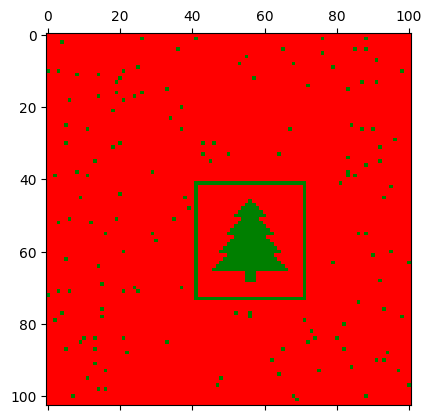

In [122]:
with open ('data/day14.txt') as f:
    robots = tuple(tuple(map(lambda i: tuple(map(int, i.split(','))), line.replace('p=', '').replace('v=', '').split(' '))) for line in f)

def future_room(robots, room_shape, steps=100):
    normalizer = np.array(room_shape)
    room = np.zeros(room_shape, dtype=int)
    positions = []
    for robot in robots:
        p, v = np.asarray(robot[0])[::-1], np.asarray(robot[1])[::-1]
        new_p = (p + v * steps) % normalizer
        room[new_p[0], new_p[1]] += 1
        positions.append(new_p)
    return room, np.array(positions)

def get_safety_factor(room):
    X, Y = room.shape
    q1 = room[0:X // 2, 0:Y // 2].sum()
    q2 = room[0:X // 2, Y // 2 + 1:Y].sum()
    q3 = room[X // 2 + 1:X, 0:Y // 2].sum()
    q4 = room[X // 2 + 1:X, Y // 2 + 1:Y].sum()
    return (q1 * q2 * q3 * q4).item()

def distance_to_centroid(room, positions):
    centroid = np.array([np.mean(positions[:, 0]), np.mean(positions[:, 1])])
    return statistics.mean(np.sum(np.abs(pos - centroid)) for pos in positions)

new_room, positions = future_room(robots, (103, 101))
sf = get_safety_factor(new_room)
steps_to_christamas_tree = min(range(10_000), key=lambda i: distance_to_centroid(*future_room(robots, (103, 101), steps=i)))

print(f"Answer 1: {sf}")
print(f"Answer 3: {steps_to_christamas_tree}")
plt.matshow(future_room(robots, (103, 101), steps=6516)[0], cmap=ListedColormap(['r', 'g']))

------------

### Day 15: Warehouse Woes ⚓️

Instead of writing a move in any direction (as I did also in some of the past days), I'll code the move just once from left to right `left -> right` (easier to read for an european -- maybe less for an arabic or chinese), and I'll rotate the matrix of space in case the movement is in another direction. So, the rotations 🛞 will be the followings:
- `>`: roatate of `0` degrees
- `^`: roatate of `90` degrees
- `<`: roatate of `180` degrees
- `v`: roatate of `270` degrees
I think in this way the code is gonna be cleaner.

It worked. The code seems shorter and cleaner: awarded 👨🏾‍⚖️. The move is simple, if at the right of the robot I see a spece I simply move the robot, if there is a box I firstly check if at right of box there is a space and if this space is not coming after a wall (we hve boxes, not ghosts 👻, otherwise it would be an advent to halloween 🎃).

For the second part we need a different warehouse I originally will call `wh2`. The only thing that is preventing us from working with elements of 2 `char`(e.g., `##`, `[]`) in the array representing space is the fact that movements are still of 1 step, and that fucking space appearing at the right of the robot in `@.` 🖕🏼. Let me think about it...💭.

I think there is no work around. We need to rewrite our `apply_move`, but before doing this I enumerate the obstacles to better understand which is the counter part of each `[` or `]` whenever I need to move it. This is kind of boring, the first part is often okay, the second it seems they are just trying to make previous part more complicated but they just make it more boring. You are not forced to propose a part 2 guys 🚫, I already do enough boring things at work 💼.

I need a `get_movables` method to get all boxes we are moving together. Finally, `apply_move_2` is a great showing of how concise code can be using `numpy`.

In [33]:
with open ('data/day15.txt') as f:
    lines = list(f.readlines())
    sep = next(i for i, line in enumerate(lines) if line == '\n')
    wh = np.asarray(list(map(lambda i: list(i.replace('\n', '')), lines[:sep])))
    wh2 = np.asarray(list(map(lambda i: list(i.replace('\n', '').replace('.','..').replace('@','@.').replace('#', '##').replace('O','[]')), lines[:sep]))).astype(object)
    for n, (openx, openy, closex, closey) in enumerate(zip(np.where(wh2 == '[')[0], np.where(wh2 == '[')[1], np.where(wh2 == ']')[0], np.where(wh2 == ']')[1])):
        wh2[openx, openy], wh2[closex, closey] = str(n), str(n)
    box_id = set(map(str, range(n + 1)))
    moves = ''.join(lines[sep+1:]).replace('\n', '')

def rotate(wh, move, reverse=False):
    return np.rot90(wh, ['>', '^', '<', 'v'].index(move), axes=(1, 0) if not reverse else (0, 1))

def get_pos(wh):
    return tuple(np.concat(np.where(wh == '@')))

def apply_move(wh, move):
    wh = rotate(wh, move)
    pos = get_pos(wh)
    if wh[pos[0], pos[1] + 1] == '.':
        wh[pos], wh[pos[0], pos[1] + 1] = '.', '@'
    elif wh[pos[0], pos[1] + 1] == 'O' and \
        (next_empty := next((pos[1] + 1 + j for j, v in enumerate(wh[pos[0], pos[1] + 1:]) if v == '.'), None)) is not None and \
        (next_wall := next((pos[1] + 1 + j for j, v in enumerate(wh[pos[0], pos[1] + 1:]) if v == '#'), float('inf'))) > next_empty:
        wh[pos[0], pos[1] + 1 : next_empty + 1], wh[pos] = wh[pos[0], pos[1] : next_empty], '.'
    return rotate(wh, move, reverse=True)

def get_movables(box, wh):
    movables, queue = set(), [box]
    while len(queue) > 0:
        cb = heapq.heappop(queue)
        movables.add(cb)
        x, y = np.where(wh == cb)
        neighbours = set(wh[x, y + 1]) - {'#', '.', cb}
        for i in neighbours: heapq.heappush(queue, i)
    return movables

def apply_move_2(wh, move, box_id):
    wh = rotate(wh, move)
    pos = get_pos(wh)
    if wh[pos[0], pos[1] + 1] == '.':
        wh[pos], wh[pos[0], pos[1] + 1] = '.', '@'
    elif wh[pos[0], pos[1] + 1] in box_id:
        movables = get_movables(wh[pos[0], pos[1] + 1], wh)
        movables_x, movables_y = np.where(np.isin(wh, np.array(list(movables))))
        if np.all(wh[movables_x, movables_y + 1] != '#'):
            to_move = wh[movables_x, movables_y]
            wh[movables_x, movables_y] = '.'
            wh[movables_x, movables_y + 1] = to_move
            wh[pos[0], pos[1] + 1] = '@'
            wh[pos[0], pos[1]] = '.'
    return rotate(wh, move, reverse=True)

wh = functools.reduce(lambda cwh, move: apply_move(cwh, move), moves, wh)
x, y = np.where(np.asarray(wh) == 'O')
coordinates_cost = np.sum(x * 100 + y).item()

wh2 = functools.reduce(lambda cwh, move: apply_move_2(cwh, move, box_id), moves, wh2)
coordinates_cost2 = sum(np.where(wh2 == i)[0].min() * 100 + np.where(wh2 == i)[1].min() for i in box_id)

print(f"Answer 1: {coordinates_cost}")
print(f"Answer 2: {coordinates_cost2}")

Answer 1: 1398947
Answer 2: 1397393


---------

### Day 16: Reindeer Maze 🧶

A clew, as the one used by Minosse to exit the labyrinth with the Minotaur (since we are talking about a labyrinth). Anglosaxon culture is so poor. Mediterranean people have so many stories and history to tell 🏛️🏺.

This is simply a Dijkstra or an A* with an additional cost per each move due to the rotation. This also means we cannot simply store a visited position in the set of covered ones, but we need to consider position and side from which we entered the new position (translated: `(positions, previous position)`. Seems much more fun than the previous ones 🤡. All the core is in `path_finding` function, the rest is just a set of support functions and two methods `get_path` and `plot_path` respectively to get the shortest path and graphically present it (nice 🖼️).

I've not been implementing Dijkstra from scratch for while 👴🏻, but, as I think in the classic, the important things are a `queue` (or heap) where we keep track of next positions to visit by prioritising the ones with a lower cost, a set of `visited` positions by considering also the rotation or previous position, a map of minimum `costs` to reach a position, and a map of `prev` (previous) position with minimum cost to reconstruct the path 🥇. Is there a computationally faster way? - Yes 🙂‍↕️ - Do we need it? - No 🙂‍↔️.

I'm flying home for Christmas ✈️, I'm on the flight and I cannot submit the answer now, if it's not correct the description will follow, otherwise I would switch to part 2. I already miss my cat 🐈‍⬛. Need to provide her a new big house 💪🏽.

Okay, it was correct, here the second part ⏭️. Again a very vague question. If I understand correctly we need to return the tiles parto fo the best paths. Now the question is, when a path is considered a best path? ✝️ My intuition is that a path is a best path if (i) it is arriving to destination, and (ii) it is not passing 2 times on the same position. Please guys, next year avoid part 2 if you don't have ideas. Okay, so the best paths are essentially paths with the same cost of the previously computed one 😑. It's not as simple as it seems, but we just need to slightly modify current function by storing the path to a position every time we put it into the queue, and store the path once we reach the end 🥵.

Answer 1: 91464
Answer 2: 494


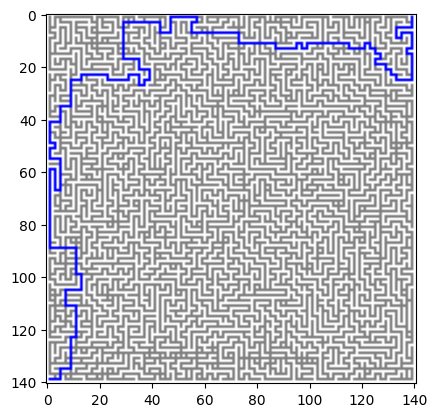

In [5]:
maze = pd.read_csv('data/day16.txt', sep='', engine='python', header=None, index_col=None).to_numpy()[:, 1:-1]
start = tuple(map(int, map(operator.itemgetter(0), np.where(maze == 'S'))))
end = tuple(map(int, map(operator.itemgetter(0), np.where(maze == 'E'))))
maze[maze == '#'] = 1
maze[np.isin(maze, ('.', 'S', 'E'))] = 0
maze = maze.astype(int)

def get_path(start, end, prev):
    cpos, path = end, [end]
    while cpos != start:
        cpos = prev[cpos]
        path.append(cpos)
    return list(reversed(path))

def plot_path(maze, path):
    m = maze.copy()
    for i in path: m[i] = 2
    plt.imshow(m, cmap=ListedColormap(['grey', 'white', 'b']))

def get_neighbours(pos, maze, tabu=None):
    return tuple((i, j) for i, j in ((pos[0], pos[1] + 1), (pos[0] + 1, pos[1]), (pos[0], pos[1] - 1), (pos[0] - 1, pos[1]))
                 if 0 <= i < maze.shape[0] and 0 <= j < maze.shape[1] and maze[i, j] == 0)

def minus(x, y):
    return x[0] - y[0], x[1] - y[1]

def get_incremental_cost(pos, cpos, ppos):
    return 1 if ppos is None or minus(pos, cpos) == minus(cpos, ppos) else 1001

def path_finding(maze, start, end):
    queue, prev, costs, visited, paths = [(0, start, None, [start])], dict(), collections.defaultdict(lambda: float('inf')), set(), []
    while len(queue) > 0:
        ccost, cpos, ppos, path = heapq.heappop(queue)
        visited.add((cpos, ppos))
        if ccost <= costs[cpos]:
            costs[cpos] = ccost
            prev[cpos] = ppos
        if cpos == end:
            paths.append(path)
            continue
        for i in get_neighbours(cpos, maze, ppos):
            if i != ppos and not (i, cpos) in visited:
                heapq.heappush(queue, (ccost + get_incremental_cost(i, cpos, ppos), i, cpos, path + [i]))
    sits = functools.reduce(lambda sits, p: sits | set(p), paths, set())
    return costs[end], get_path(start, end, prev), sits

path_cost, path, sits = path_finding(maze, start, end)
print(f"Answer 1: {path_cost}")
print(f"Answer 2: {len(sits)}")
plot_path(maze, path)

----------

### Day 17: Chronospatial Computer 🖥️

First part doesn't require any comment. It seems also an old 👴🏻 exercise because GPT wrote the solution in `run_program` by itself 🤨. Or the AI is taking control, or this exercise was already somewhere in the web 🚷.

For part 2, I firtly tried a brute force in `fine_tune`. It doesn't work 😫. Aaaaaah.

I know nothing about binary, octals, octopus 🐙, and other nerd shits 🤓. But, as a real folk 👨🏼‍🌾 like Cletus in The Simpsons 🌽, I noticed that if we print the octal of A `oct(A)` every time we `yield` a value of the result, we see a certain trend for which every `A[i]` is `A[i+1]` concatenated to an additional number in `[0,8)` (until `A[0]` which is the starting one required by the exercise).
```
0o10623007 2
0o1062300 0
0o106230 7
0o10623 3
0o1062 0
0o106 3
0o10 1
0o1 3
0o0 7
Answer 1: 2,0,7,3,0,3,1,3,7
```
Let's try in this way, at each iteration we get a new number to concat to the octal of A. I figured out later that taking the first candidate is not enough, sometimes the second option is the correct and you figure it out only few iterations later. That's why in `search_A` I keep track of all `candidates` to finally return the smaller one. Pyhton `eval` to execute strings at run time is a godsend 👼🏻.

In [177]:
register_to_val = {'Register A': 4, 'Register B': 5, 'Register C': 6, 'Program': 'Program'}

with open("data/day17.txt") as f:
    register = {register_to_val[line.split(': ')[0]]: int(line.split(': ')[1]) if line.split(': ')[0] != 'Program' else tuple(map(int, line.split(': ')[1].split(','))) for line in f}

def run_program(register, A=None):
    A, B, C, prog = A or register[4], register[5], register[6], register['Program']
    pc = 0
    while pc < len(prog):
        op, val = prog[pc:pc+2]
        pc += 2
        combo = (A if val == 4 else B if val == 5 else C if val == 6 else val)
        match op:
            case 0: A = A // (2 ** combo)
            case 6: B = A // (2 ** combo)
            case 7: C = A // (2 ** combo)
            case 1: B = B ^ val
            case 4: B = B ^ C
            case 2: B = combo % 8
            case 5: yield combo % 8
            case 3:
                if A: pc = val

def fine_tune(register, maxiter=10_000):
    return next(i for i in range(maxiter) if tuple(run_program(register, A=i)) == register['Program'])

def search_A(register):
    root, tail, prog, candidates = "int(0o", ")", register['Program'], set([""])
    for j in range(len(prog)):
        for candidate in tuple(candidates):
            candidates.remove(candidate)
            for i in range(8):
                if tuple(run_program(register, A=eval(root + candidate + str(i) + tail))) == prog[-1 * (j+1):]:
                    candidates.add(candidate + str(i))
    return min(eval(root + i + tail) for i in candidates)

print(f"Answer 1: {','.join(tuple(map(str, run_program(register))))}")
print(f"Answer 2: {search_A(register)}")

Answer 1: 2,0,7,3,0,3,1,3,7
Answer 2: 247839539763386
